In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score,ConfusionMatrixDisplay,accuracy_score

# objective: 
- To predicted "Death" situation with more than 80% accuracy i.e predict patients who are at high risk of death from covid
- Apply atleast 3 ML Models
- Balance the training data before fitting the model.

In [2]:
# read the dataset
# Since 97,99 represent the NaN values, therefore , need to specify here so that pandas can treat it as NaN
df = pd.read_csv(r"D:\OneDrive - NITT\Custom_Download\Covid Data.csv",na_values=[97,99])

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2,...,2,2,1,2,2,2,2,2,3,NaN
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2,...,2,2,1,2,2,1,1,2,5,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1,...,2,2,2,2,2,2,2,2,3,2.0
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2,...,2,2,2,2,2,2,2,2,7,NaN
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1,...,2,2,1,2,2,2,2,2,3,NaN


In [4]:
print('Data Shape :', df.shape) # check the shape

Data Shape : (1048575, 21)


In [5]:
df.info() # Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             1048575 non-null  object 
 5   INTUBED               192706 non-null   float64
 6   PNEUMONIA             1032572 non-null  float64
 7   AGE                   1048354 non-null  float64
 8   PREGNANT              525064 non-null   float64
 9   DIABETES              1048575 non-null  int64  
 10  COPD                  1048575 non-null  int64  
 11  ASTHMA                1048575 non-null  int64  
 12  INMSUPR               1048575 non-null  int64  
 13  HIPERTENSION          1048575 non-null  int64  
 14  OTHER_DISEASE         1048575 non-

In [6]:
df.describe() # Generate descriptive statistics.

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,192706.000000,1.032572e+06,1.048354e+06,525064.000000,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,192543.000000
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,1.825351,1.864379e+00,4.178230e+01,2.670876,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,1.912446
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,0.379668,3.423854e-01,1.688961e+01,8.090506,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,0.282647
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000,2.000000e+00,3.000000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,2.000000,2.000000e+00,4.000000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000,2.000000e+00,5.300000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,1.210000e+02,98.000000,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,2.000000


In [7]:
# check for percentage of NaN values
df.isna().mean()*100

USMER                    0.000000
MEDICAL_UNIT             0.000000
SEX                      0.000000
PATIENT_TYPE             0.000000
DATE_DIED                0.000000
INTUBED                 81.622106
PNEUMONIA                1.526166
AGE                      0.021076
PREGNANT                49.925947
DIABETES                 0.000000
COPD                     0.000000
ASTHMA                   0.000000
INMSUPR                  0.000000
HIPERTENSION             0.000000
OTHER_DISEASE            0.000000
CARDIOVASCULAR           0.000000
OBESITY                  0.000000
RENAL_CHRONIC            0.000000
TOBACCO                  0.000000
CLASIFFICATION_FINAL     0.000000
ICU                     81.637651
dtype: float64

In [8]:
#  As per dataset description: If the patient died indicate the date of death, and 9999-99-99 otherwise.
df['DATE_DIED']

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [9]:
# create a new column as Target to predict patients who are at high risk of death from covid
df['DEATH'] = [0 if row=='9999-99-99' else 1 for row in df['DATE_DIED']]

In [10]:
df['DEATH']

0          1
1          1
2          1
3          1
4          1
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: DEATH, Length: 1048575, dtype: int64

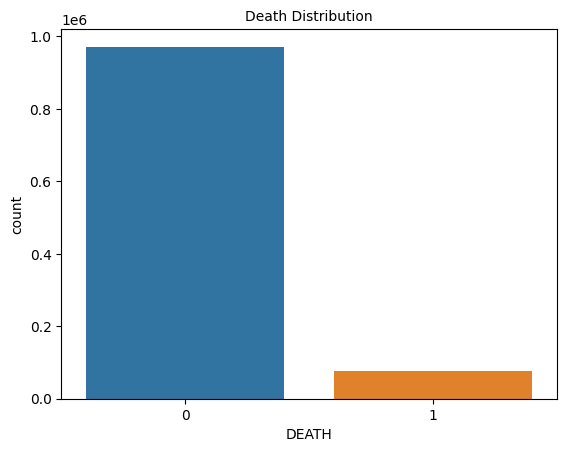

In [11]:
# check for class Distribution
ax = sns.countplot(x=df['DEATH'])
plt.title('Death Distribution', fontsize=10)
plt.show()

In [12]:
# 'INTUBED','PREGNANT','ICU' all three have high percentage of missing (NaN) values
# and DATE_DIED is of no use since a new column called DEATH has been created from this.
# hence we can delete these columns.

col_to_drop = ['INTUBED','PREGNANT','ICU','DATE_DIED']

In [13]:
# drop those columns
df.drop(col_to_drop,axis=1,inplace=True)

In [14]:
# check for percentage of NaN values.
df.isna().mean()*100

USMER                   0.000000
MEDICAL_UNIT            0.000000
SEX                     0.000000
PATIENT_TYPE            0.000000
PNEUMONIA               1.526166
AGE                     0.021076
DIABETES                0.000000
COPD                    0.000000
ASTHMA                  0.000000
INMSUPR                 0.000000
HIPERTENSION            0.000000
OTHER_DISEASE           0.000000
CARDIOVASCULAR          0.000000
OBESITY                 0.000000
RENAL_CHRONIC           0.000000
TOBACCO                 0.000000
CLASIFFICATION_FINAL    0.000000
DEATH                   0.000000
dtype: float64

In [15]:
# fill the NaN values with average of respective column
df['PNEUMONIA'] = df['PNEUMONIA'].fillna(df['PNEUMONIA'].mean())
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())

In [16]:
# Again check for percentage of NaN values.
df.isna().mean()*100

USMER                   0.0
MEDICAL_UNIT            0.0
SEX                     0.0
PATIENT_TYPE            0.0
PNEUMONIA               0.0
AGE                     0.0
DIABETES                0.0
COPD                    0.0
ASTHMA                  0.0
INMSUPR                 0.0
HIPERTENSION            0.0
OTHER_DISEASE           0.0
CARDIOVASCULAR          0.0
OBESITY                 0.0
RENAL_CHRONIC           0.0
TOBACCO                 0.0
CLASIFFICATION_FINAL    0.0
DEATH                   0.0
dtype: float64

- Now , there is no Missing values

In [17]:
# check for number of unique values among featues
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
PNEUMONIA                 3
AGE                     120
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
DEATH                     2
dtype: int64

In [18]:
# check columns different values
for col in df:
    print(col)
    print(df[col].value_counts(),'\n')

USMER
2    662903
1    385672
Name: USMER, dtype: int64 

MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64 

SEX
1    525064
2    523511
Name: SEX, dtype: int64 

PATIENT_TYPE
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64 

PNEUMONIA
2.000000    892534
1.000000    140038
1.864379     16003
Name: PNEUMONIA, dtype: int64 

AGE
30.0     27010
31.0     25927
28.0     25313
29.0     25134
34.0     24872
         ...  
114.0        2
116.0        2
111.0        1
121.0        1
113.0        1
Name: AGE, Length: 120, dtype: int64 

DIABETES
2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64 

COPD
2     1030510
1       15062
98       3003
Name: COPD, dtype: int64 

ASTHMA
2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64 

INMSUPR
2     1031001
1       14170
98       3404
Name: INMSU

In [19]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

# except Age column all are within a small range of value i.e discrete values, hence scale Age column
df['AGE'] = standard_scaler.fit_transform(df.loc[:,['AGE']])

In [20]:
# get X and y
X = df.drop('DEATH', axis=1)
y = df['DEATH']

In [21]:
# split the data into train and test i.e 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [22]:
# check shapes
print('Train X :', X_train.shape)
print('Test X :', X_test.shape)
print('Train Y :', y_train.shape)
print('Test Y :', y_test .shape)

Train X : (838860, 17)
Test X : (209715, 17)
Train Y : (838860,)
Test Y : (209715,)


In [23]:
# check for class distribution, its not balanced
y_train.value_counts()

0    777158
1     61702
Name: DEATH, dtype: int64

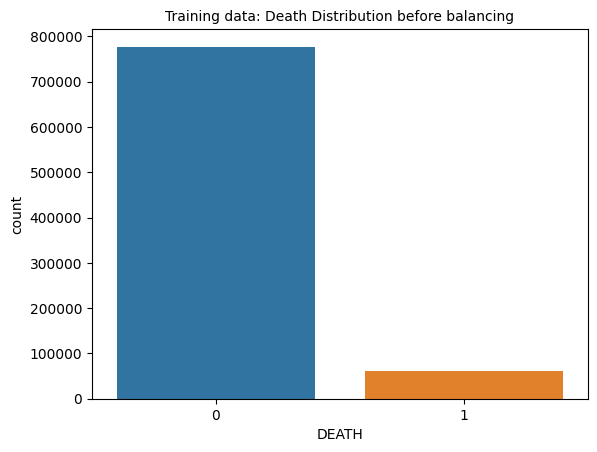

In [24]:
ax = sns.countplot(x=y_train)
plt.title('Training data: Death Distribution before balancing', fontsize=10)
plt.show()

In [25]:
from imblearn.over_sampling import SMOTE

# perform data balancing using over sampling of minority class data.
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [26]:
# check for class distribution after balancing, its balanced now
y_train.value_counts()

0    777158
1    777158
Name: DEATH, dtype: int64

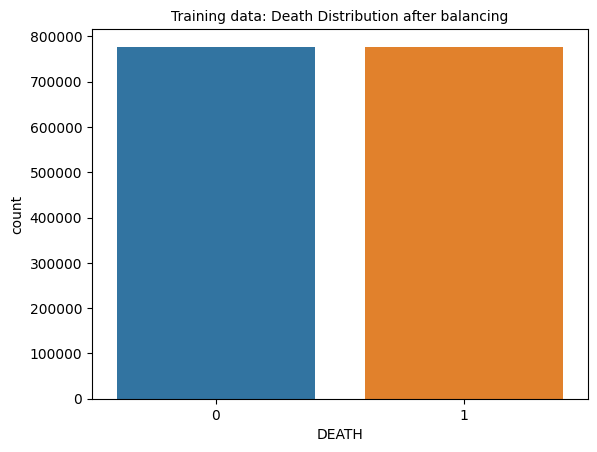

In [27]:
ax = sns.countplot(x=y_train)
plt.title('Training data: Death Distribution after balancing', fontsize=10)
plt.show()

In [28]:
# store all the model classificers
models = {
    'LogisticRegression': LogisticRegression(n_jobs=-1,random_state = 42),
    "RandomForest": RandomForestClassifier (random_state = 42,n_jobs=-1),
    "DecisionTree": DecisionTreeClassifier(random_state = 42),
    "AdaBoostClassifier" :AdaBoostClassifier(random_state = 42)
}

In [29]:
# function to return various performance measure
def perf_measure (y_true, y_pred):
    
    all_per_list  = []
    
    # compute accuracy,recall, precision,f1-score and AUC
    all_per_list.append (accuracy_score (y_true, y_pred))
    all_per_list.append (recall_score (y_true, y_pred))
    all_per_list.append (precision_score (y_true, y_pred))
    all_per_list.append (f1_score (y_true, y_pred))
    all_per_list.append (roc_auc_score (y_true, y_pred))
    
    return all_per_list

In [30]:
y_pred_train = {} # store y_predicted for training
y_pred_test = {} # store y_predicted for testing

cm = {}  # store confusion  matrix 
Train_Score_algorithm = {} # store performance measure
Test_Score_algorithm = {} # store performance measure

# iterate through all the models
for model_name, clf in tqdm(models.items ()):
    
    # train the model
    clf.fit (X_train, y_train)
    
    # perform prediction on train set
    y_pred_train [model_name] = clf.predict (X_train)
    
    # perform prediction on test set
    y_pred_test [model_name] = clf.predict (X_test)
    
    # store performance measure in Train_Score_algorithm, Test_Score_algorithm dictionary where model_name is key
    Train_Score_algorithm [model_name] = perf_measure (y_train,  y_pred_train [model_name])
    Test_Score_algorithm [model_name] = perf_measure (y_test,  y_pred_test [model_name])
    
    # store confusion matrix
    cm [model_name] = confusion_matrix (y_test,y_pred_test [model_name], normalize ="true")

  0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
# create a result dataframe from Perf_per_algorithm
train_result = pd.DataFrame.from_dict(Train_Score_algorithm, orient='index', 
                       columns=['Accuracy', 'Recall', 'Precision', 'F1', 'AUC'])

# create a result dataframe from Perf_per_algorithm
test_result = pd.DataFrame.from_dict(Test_Score_algorithm, orient='index', 
                       columns=['Accuracy', 'Recall', 'Precision', 'F1', 'AUC'])



In [32]:
train_result

,Accuracy,Recall,Precision,F1,AUC
LogisticRegression,0.903790,0.917871,0.892729,0.905126,0.903790
RandomForest,0.972847,0.987380,0.959492,0.973236,0.972847
DecisionTree,0.972858,0.983526,0.962979,0.973144,0.972858
AdaBoostClassifier,0.903249,0.908297,0.899219,0.903735,0.903249


In [33]:
test_result

,Accuracy,Recall,Precision,F1,AUC
LogisticRegression,0.891105,0.918963,0.393322,0.550868,0.903942
RandomForest,0.916139,0.715617,0.451426,0.553618,0.823735
DecisionTree,0.916720,0.613255,0.446814,0.516968,0.776878
AdaBoostClassifier,0.897876,0.903412,0.408388,0.562499,0.900427


------------LogisticRegression-----------


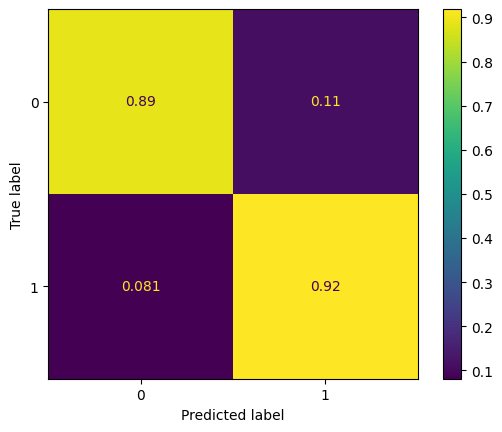

------------RandomForest-----------


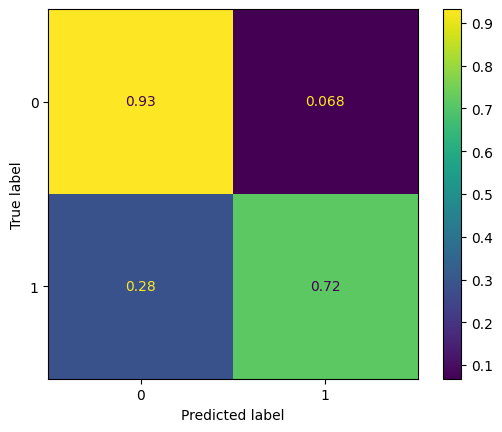

------------DecisionTree-----------


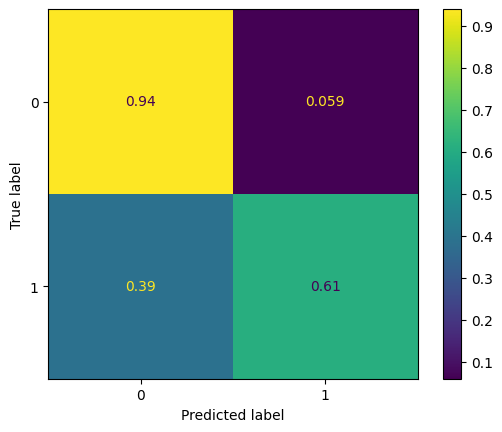

------------AdaBoostClassifier-----------


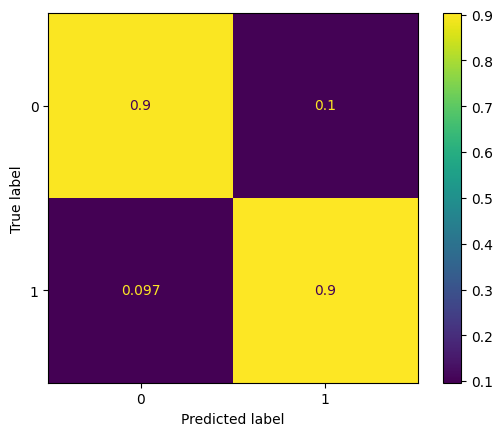

In [34]:
# display confusion matrix
for name,confusion in cm.items():
    print(f"------------{name}-----------")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion,
                                  display_labels=[0,1])
    disp.plot()
    plt.show()

- based on the result , its safe to say that Logistic regression is the best performing model with robust prediction ability on train and test set for both the classes with 90% accuracy.Remaining three model suffer from overfitting i.e., more accuracy on train set and very less accuracy of test set